a) Do some initial EDA on this dataset. For example checking null values, look at some statistical properties.

In [32]:
import pandas as pd

file_path = "../data/supahcoolsoft.csv"
df = pd.read_csv(file_path)

null_values = df.isnull().sum()

statistics = df.describe()

data_types = df.dtypes

data_info = df.info()
# Display the results
print("Null Values in Each Column:\n", null_values)
print("\nStatistical Summary:\n", statistics)
print("\nData Types:\n", data_types)
print("\nData Info:\n", data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   100 non-null    object 
 1   FirstName    100 non-null    object 
 2   LastName     100 non-null    object 
 3   Age          100 non-null    int64  
 4   Department   98 non-null     object 
 5   Position     99 non-null     object 
 6   Salary_SEK   99 non-null     float64
 7   Email        100 non-null    object 
 8   PhoneNumber  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB
Null Values in Each Column:
 EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64

Statistical Summary:
               Age    Salary_SEK
count  100.000000     99.000000
mean    43.430000  52049.181818
std     10.032528  10993.553359
min     25.000000  30452.00

b) See if there are some null values that you can fill in based on your domain knowledge within the data field.

In [47]:
import pandas as pd

file_path = "../data/supahcoolsoft.csv"
df = pd.read_csv(file_path)

null_values = df.isnull().sum()
print("Null Values in Each Column:\n", null_values)

fillnadepartment = df['Department'].mode()[0]
fillnaposition = df['Position'].mode()[0]
fillnasalary = df['Salary_SEK'].median()

# Assigning the filled DataFrame back
df['Department'] = df['Department'].fillna(value=fillnadepartment)
df['Position'] = df['Position'].fillna(value=fillnaposition)
df['Salary_SEK'] = df['Salary_SEK'].fillna(value=fillnasalary)

null_values_after = df.isnull().sum()
print("\nNull Values After Filling:\n", null_values_after)


Null Values in Each Column:
 EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64

Null Values After Filling:
 EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     0
Position       0
Salary_SEK     0
Email          0
PhoneNumber    0
dtype: int64


c) Find out some statistical information about the salary, e.g. mean, median, min, max, 10 percentile and 90 percentile.

In [34]:
df['Salary_SEK'].fillna(df['Salary_SEK'].median())
    
mean_salary = df['Salary_SEK'].mean()
median_salary = df['Salary_SEK'].median()
min_salary = df['Salary_SEK'].min()
max_salary = df['Salary_SEK'].max()
percentile_10 = df['Salary_SEK'].quantile(0.10)
percentile_90 = df['Salary_SEK'].quantile(0.90)

print("Salary Statistics:")
print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")
print(f"Min Salary: {min_salary:.2f}")
print(f"Max Salary: {max_salary:.2f}")
print(f"10th Percentile: {percentile_10:.2f}")
print(f"90th Percentile: {percentile_90:.2f}")


Salary Statistics:
Mean Salary: 52049.18
Median Salary: 52919.00
Min Salary: 30452.00
Max Salary: 69742.00
10th Percentile: 36541.60
90th Percentile: 67029.40


  d) Group by different roles and take the median and average salaries for each group.

In [35]:
roles_salary = df.groupby("Position")["Salary_SEK"].agg(["median", "mean"])


print(roles_salary)

                            median          mean
Position                                        
AI Specialist              62760.5  62246.000000
BI Developer               48608.5  48276.000000
Big Data Engineer          57958.0  57958.000000
Data Architect             60572.0  59525.600000
Data Scientist             51919.0  51722.333333
Database Administrator     48482.0  47706.800000
ETL Developer              44192.0  45239.111111
Junior Data Analyst        34877.5  35195.300000
Junior Data Engineer       41905.0  40000.200000
Junior Data Scientist      43595.5  43813.125000
Machine Learning Engineer  51806.0  53161.875000
Senior Data Analyst        57114.5  58586.800000
Senior Data Engineer       65740.0  64918.750000
Senior Data Scientist      65526.0  64451.857143


  e) Group by different departments and take the median and average salaries for each group.

In [36]:
department_salary = df.groupby("Department")["Salary_SEK"].agg(["median", "mean"])


print(department_salary)

                     median          mean
Department                               
Data Science        47256.5  50978.625000
DevOps              48503.0  51043.000000
Engineering         48507.5  48424.600000
IT                  53193.0  53585.062500
Product Management  53772.0  54871.769231


  f) Graph different data engineers salary. There are many approaches to graph this, try different and reason about pros and cons of each you choose.

In [37]:
df.head()

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24


In [38]:
import pandas as pd

file_path = "../data/supahcoolsoft.csv"
df = pd.read_csv(file_path)

df = df.set_index('Position')

positions_of_interest = ['Big Data Engineer', 'Junior Data Engineer', 'Senior Data Engineer']
filtered_df = df.loc[df.index[df.index.isin(positions_of_interest)]]

print(filtered_df)


                     EmployeeID FirstName   LastName  Age          Department  \
Position                                                                        
Junior Data Engineer       E010       Ove    Larsson   54        Data Science   
Junior Data Engineer       E011    Fatima       Khan   41              DevOps   
Junior Data Engineer       E018    Gustaf    Jönsson   50  Product Management   
Junior Data Engineer       E076       Mia      Patel   30        Data Science   
Junior Data Engineer       E096      Erik    Höglund   55        Data Science   
...                         ...       ...        ...  ...                 ...   
Senior Data Engineer       E055    Sophia   Martinez   39  Product Management   
Senior Data Engineer       E067       Gun  Jakobsson   60        Data Science   
Senior Data Engineer       E086    Olivia      Brown   53                  IT   
Senior Data Engineer       E089       Wei      Zhang   30              DevOps   
Senior Data Engineer       E

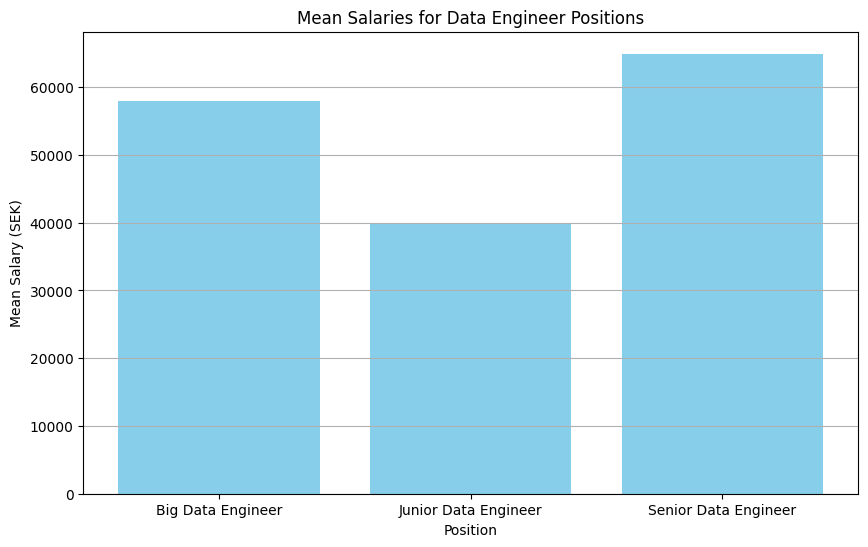

In [39]:
import matplotlib.pyplot as plt

positions_of_interest = ['Big Data Engineer', 'Junior Data Engineer', 'Senior Data Engineer']
filtered_df = df.loc[df.index[df.index.isin(positions_of_interest)]]

mean_salaries = filtered_df.groupby('Position')['Salary_SEK'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_salaries.index, mean_salaries, color='skyblue')
plt.xlabel('Position')
plt.ylabel('Mean Salary (SEK)')
plt.title('Mean Salaries for Data Engineer Positions')
plt.grid(axis='y')
plt.show()


C:\Users\lager\AppData\Local\Temp\ipykernel_18200\2855339099.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=salary_data.index)


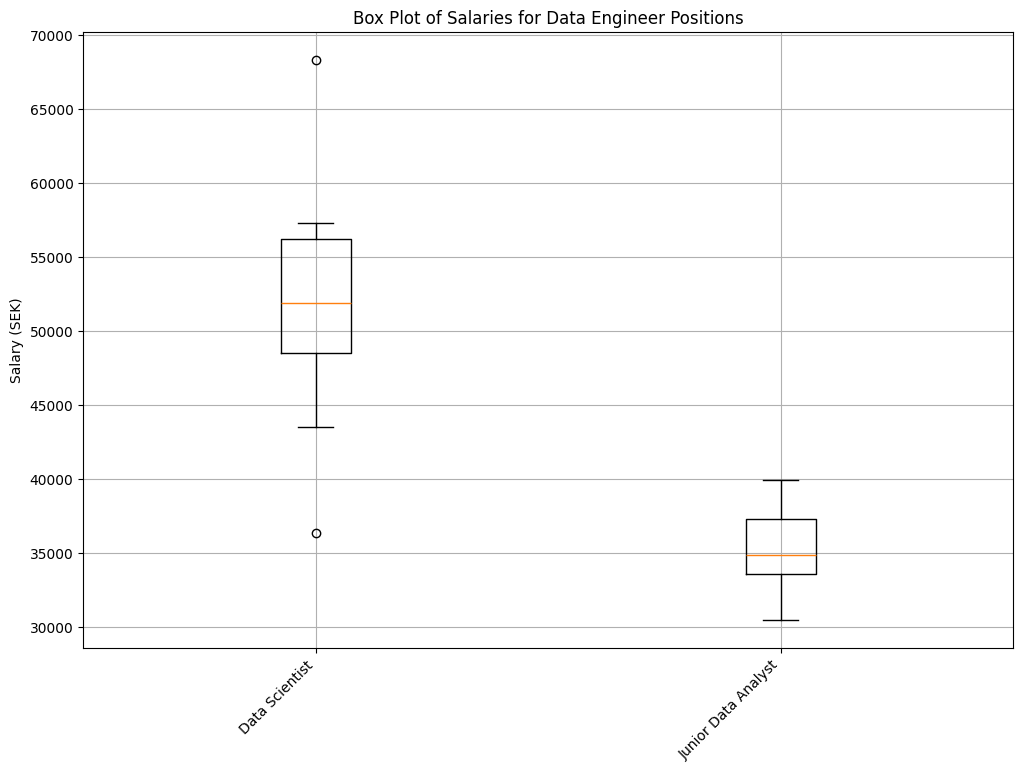

In [51]:
import matplotlib.pyplot as plt
import numpy as np

salary_data = filtered_df.groupby('Position')['Salary_SEK'].apply(list)

data = [np.array(salaries) for salaries in salary_data]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=salary_data.index)
plt.ylabel('Salary (SEK)')
plt.title('Box Plot of Salaries for Data Engineer Positions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


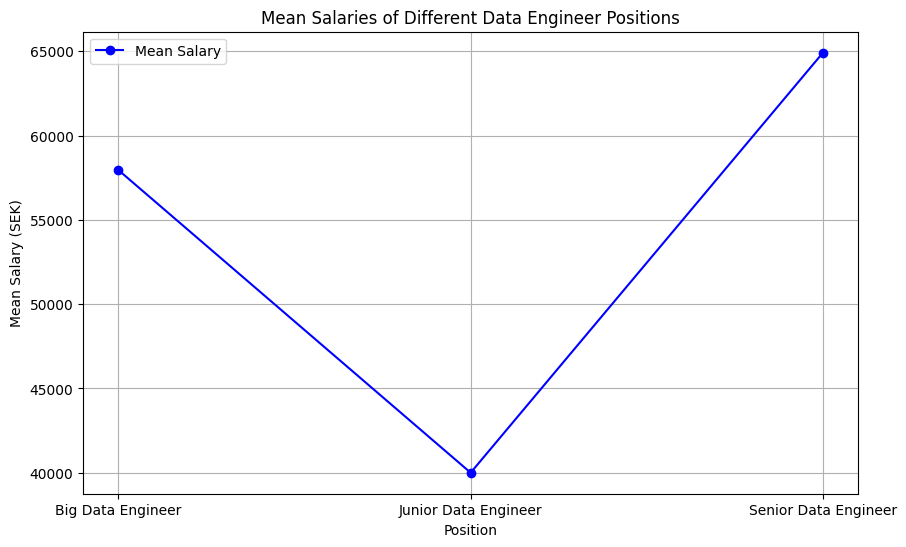

In [41]:
import matplotlib.pyplot as plt

mean_salaries = filtered_df.groupby('Position')['Salary_SEK'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_salaries.index, mean_salaries, marker='o', linestyle='-', color='b', label='Mean Salary')
plt.xlabel('Position')
plt.ylabel('Mean Salary (SEK)')
plt.title('Mean Salaries of Different Data Engineer Positions')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\lager\AppData\Local\Temp\ipykernel_18200\1819537989.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Position', y='Salary_SEK', data=violin_df, palette='muted')


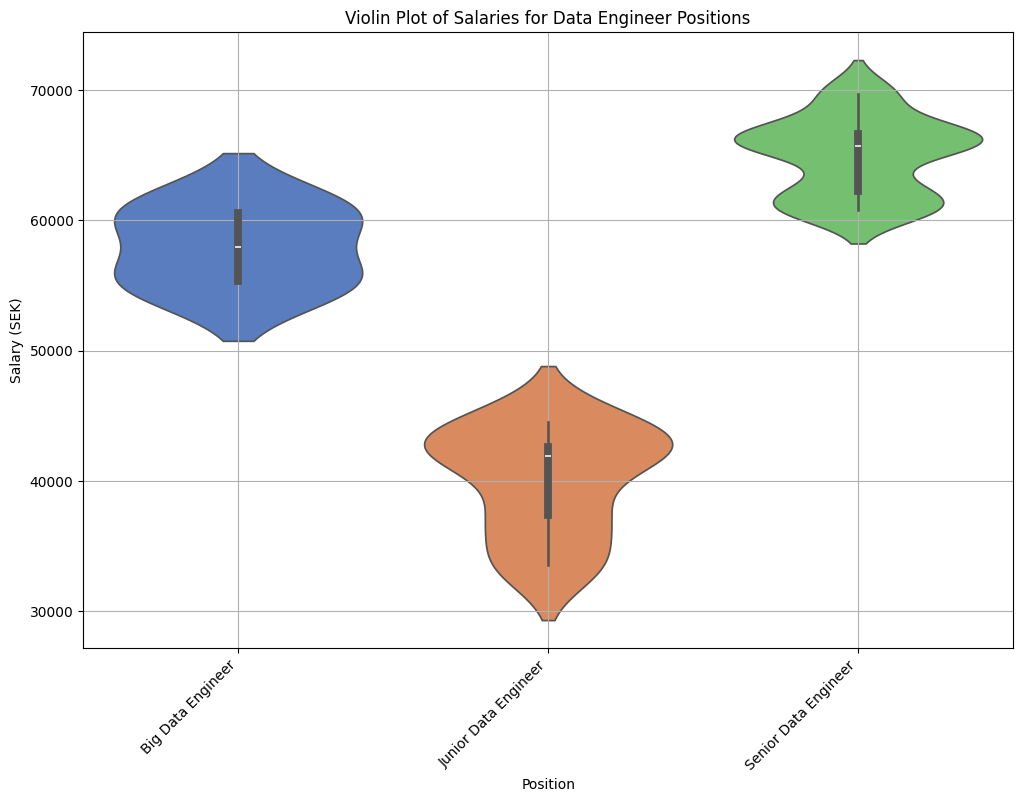

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for violin plot
# Flatten salary data and create a DataFrame for seaborn
salary_data = []
positions = []

for position, salaries in filtered_df.groupby('Position')['Salary_SEK']:
    salary_data.extend(salaries)
    positions.extend([position] * len(salaries))

violin_df = pd.DataFrame({'Position': positions, 'Salary_SEK': salary_data})

plt.figure(figsize=(12, 8))
sns.violinplot(x='Position', y='Salary_SEK', data=violin_df, palette='muted')
plt.xlabel('Position')
plt.ylabel('Salary (SEK)')
plt.title('Violin Plot of Salaries for Data Engineer Positions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


  g) You are getting interview to this company as a junior data analyst, and you have this dataset. Find out some statistical information about that role and similar role to make a case on what salary you should have.

In [50]:
import pandas as pd

file_path = "../data/supahcoolsoft.csv"
df = pd.read_csv(file_path)

relevant_positions = ['Data Analyst', 'Junior Data Analyst', 'Business Analyst', 'Data Scientist']

filtered_df = df[df['Position'].isin(relevant_positions)]

# Calculate statistical metrics
mean_salary = filtered_df['Salary_SEK'].mean()
median_salary = filtered_df['Salary_SEK'].median()
min_salary = filtered_df['Salary_SEK'].min()
max_salary = filtered_df['Salary_SEK'].max()
std_salary = filtered_df['Salary_SEK'].std()

# Print the results
print(f"Statistical Information for Roles Similar to 'Data Analyst':\n")
print(f"Mean Salary: {mean_salary} SEK")
print(f"Median Salary: {median_salary} SEK")
print(f"Minimum Salary: {min_salary} SEK")
print(f"Maximum Salary: {max_salary} SEK")
print(f"Standard Deviation: {std_salary} SEK")


Statistical Information for Roles Similar to 'Data Analyst':

Mean Salary: 43023.89473684211 SEK
Median Salary: 38178.0 SEK
Minimum Salary: 30452.0 SEK
Maximum Salary: 68339.0 SEK
Standard Deviation: 10584.715258305969 SEK


---
1. Olympic games in Paris 2024
Here is the wikipedia page for olympic games in paris 2024. We will use it for some data analysis. We'll use pandas pd.read_html() to scrape different tables in this site.

  a) How many sports are represented in total?

In [76]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"

tables = pd.read_html(url)

table_0 = tables[0]

sports_info = table_0.iloc[5, 1]

print(f"Found: {sports_info}")

parts = sports_info.split()

print(f"Total number of sports: 32")



Found: 329 in 32 sports (48 disciplines)
Total number of sports: 32


  b) Make a bar chart over the top five countries in medal count.



In [79]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"

tables = pd.read_html(url)

for i in range(len(tables)):
    print(f"Table: {i} \n{tables[i]}")

Table: 0 
                                                    0  \
0                  Emblem of the 2024 Summer Olympics   
1                                            Location   
2                                               Motto   
3                                             Nations   
4                                            Athletes   
5                                              Events   
6                                             Opening   
7                                             Closing   
8                                           Opened by   
9                                            Cauldron   
10                                              Venue   
11  Summer← Tokyo 2020Los Angeles 2028 → Winter← B...   

                                                    1  
0                  Emblem of the 2024 Summer Olympics  
1                                       Paris, France  
2   Games Wide Open (French: Ouvrons Grand les Jeu...  
3                204 (in

In [97]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"

tables = pd.read_html(url)

medals_table = tables[12]

print(medals_table.head(10))


  Rank             NOC  Gold  Silver  Bronze  Total
0    1  United States‡    40      44      42    126
1    2           China    40      27      24     91
2    3           Japan    20      12      13     45
3    4       Australia    18      19      16     53
4    5         France*    16      26      22     64
5    6     Netherlands    15       7      12     34
6    7   Great Britain    14      22      29     65
7    8     South Korea    13       9      10     32
8    9           Italy    12      13      15     40
9   10         Germany    12      13       8     33


In [107]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"

tables = pd.read_html(url)

medals_table = tables[12]

print(medals_table.head(11))

data = medals_table[['NOC', 'Total']]

data = data[~data['NOC'].str.contains('Remaining|Totals')]

top_countries_total = data.nlargest(5, 'Total')

print(top_countries_total)


     Rank             NOC  Gold  Silver  Bronze  Total
0       1  United States‡    40      44      42    126
1       2           China    40      27      24     91
2       3           Japan    20      12      13     45
3       4       Australia    18      19      16     53
4       5         France*    16      26      22     64
5       6     Netherlands    15       7      12     34
6       7   Great Britain    14      22      29     65
7       8     South Korea    13       9      10     32
8       9           Italy    12      13      15     40
9      10         Germany    12      13       8     33
10  11–91  Remaining NOCs   129     138     194    461
              NOC  Total
0  United States‡    126
1           China     91
6   Great Britain     65
4         France*     64
3       Australia     53


In [92]:
data = medals_table[['NOC', 'Total']]


In [93]:
data = data[~data['NOC'].str.contains('Remaining|Totals')]

In [94]:
data = data.dropna(subset=['Total'])
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')
data = data.dropna(subset=['Total'])


In [95]:
top_countries_total = data.nlargest(5, 'Total')


<BarContainer object of 5 artists>

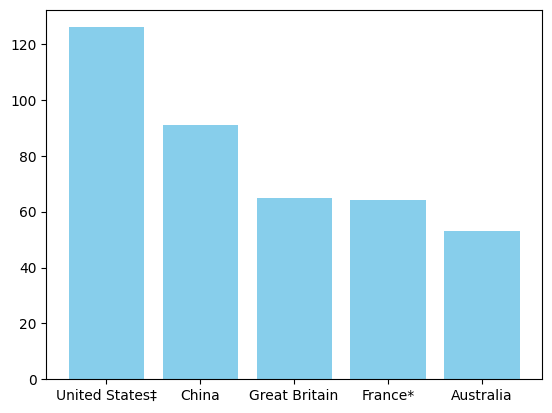

In [96]:
plt.bar(top_countries_total['NOC'], top_countries_total['Total'], color='skyblue')
